# 라이브러리 불러오기

In [1]:
!pip install statsmodels

In [1]:
from statsmodels.tsa.arima.model import ARIMA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime

In [4]:
# 경고 무시 코드
import warnings

# 경고 필터링
warnings.filterwarnings("ignore")

# 데이터 불러오기

In [5]:
df = pd.read_csv('group_n.csv')

In [6]:
df.head()

,행정동코드,자치구,행정동명,성별,연령대,총인구,1인가구수,커뮤니케이션이 적은 집단,평일 외출이 적은 집단,휴일 외출이 적은 집단,출근소요시간 및 근무시간이 많은 집단,외출이 매우 적은 집단(전체),외출이 매우 많은 집단,동영상서비스 이용이 많은 집단,생활서비스 이용이 많은 집단,재정상태에 대한 관심집단,외출-커뮤니케이션이 모두 적은 집단(전체),month
0,1101053,종로구,사직동,1,20,220.00,68.22,14.359926,6.866104,3.820062,5.904661,4.141391,5.34,9.956659,3.193028,3.881785,2.059967,2022-1
1,1101053,종로구,사직동,1,25,321.00,107.29,15.777396,12.122179,4.638637,14.334611,4.672477,12.38,11.281030,21.696222,15.718546,4.624196,2022-1
2,1101053,종로구,사직동,1,30,351.13,106.84,18.599709,16.159252,11.608842,12.383257,12.375894,19.45,16.756530,11.634911,15.172348,8.164764,2022-1
3,1101053,종로구,사직동,1,35,353.00,105.39,21.988134,12.931401,7.280876,10.779499,10.771909,16.65,15.651722,9.119746,7.399918,9.141102,2022-1
4,1101053,종로구,사직동,1,40,419.00,79.12,17.875669,7.036795,11.099494,6.050836,12.214959,10.86,11.908711,5.888620,6.302539,12.086211,2022-1


In [7]:
df.tail()

,행정동코드,자치구,행정동명,성별,연령대,총인구,1인가구수,커뮤니케이션이 적은 집단,평일 외출이 적은 집단,휴일 외출이 적은 집단,출근소요시간 및 근무시간이 많은 집단,외출이 매우 적은 집단(전체),외출이 매우 많은 집단,동영상서비스 이용이 많은 집단,생활서비스 이용이 많은 집단,재정상태에 대한 관심집단,외출-커뮤니케이션이 모두 적은 집단(전체),month
152635,1125074,강동구,길동,2,55,2299.84,305.49,23.45,37.89,18.03,39.47,22.56,13.19,31.46,31.18,25.01,44.77,2023-3
152636,1125074,강동구,길동,2,60,1585.38,226.75,20.63,39.76,14.73,35.46,32.26,7.11,30.86,18.55,11.78,44.81,2023-3
152637,1125074,강동구,길동,2,65,1084.99,189.51,11.13,18.84,17.72,18.24,19.00,2.10,15.39,24.32,27.28,22.38,2023-3
152638,1125074,강동구,길동,2,70,822.00,138.42,11.30,23.57,0.71,19.41,25.86,1.01,20.32,17.85,9.50,31.36,2023-3
152639,1125074,강동구,길동,2,75,969.21,382.42,40.56,43.54,23.95,37.81,24.43,1.30,44.29,33.25,38.41,22.81,2023-3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152640 entries, 0 to 152639
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   행정동코드                    152640 non-null  int64  
 1   자치구                      152640 non-null  object 
 2   행정동명                     152640 non-null  object 
 3   성별                       152640 non-null  int64  
 4   연령대                      152640 non-null  int64  
 5   총인구                      152640 non-null  float64
 6   1인가구수                    152640 non-null  float64
 7   커뮤니케이션이 적은 집단            152640 non-null  float64
 8   평일 외출이 적은 집단             152640 non-null  float64
 9   휴일 외출이 적은 집단             152640 non-null  float64
 10  출근소요시간 및 근무시간이 많은 집단     152640 non-null  float64
 11  외출이 매우 적은 집단(전체)         152640 non-null  float64
 12  외출이 매우 많은 집단             152640 non-null  float64
 13  동영상서비스 이용이 많은 집단         152640 non-null  float64
 14  생활서비

# 데이터 전처리

In [9]:
# 20, 25=>20대 ~ 70, 75=>70대 연령대 전처리
df['연령대'] = df['연령대'].astype(float)

conditions = [
    (df['연령대'] >= 20) & (df['연령대'] < 30),
    (df['연령대'] >= 30) & (df['연령대'] < 40),
    (df['연령대'] >= 40) & (df['연령대'] < 50),
    (df['연령대'] >= 50) & (df['연령대'] < 60),
    (df['연령대'] >= 60) & (df['연령대'] < 70),
    (df['연령대'] >= 70) & (df['연령대'] < 80)
]

values = ['20대', '30대', '40대', '50대', '60대', '70대']

# Assign the age group based on the conditions
df['연령대'] = np.select(conditions, values, default='80대')

# Print the updated '연령대' column
print(df['연령대'])


0         20대
1         20대
2         30대
3         30대
4         40대
         ... 
152635    50대
152636    60대
152637    60대
152638    70대
152639    70대
Name: 연령대, Length: 152640, dtype: object


In [10]:
# 사용자에게 입력받기 위해 성별을 남자(1) 여자(2)로 변경

df['성별'] = df['성별'].replace({1: '남성', 2: '여성'})

df.head()

,행정동코드,자치구,행정동명,성별,연령대,총인구,1인가구수,커뮤니케이션이 적은 집단,평일 외출이 적은 집단,휴일 외출이 적은 집단,출근소요시간 및 근무시간이 많은 집단,외출이 매우 적은 집단(전체),외출이 매우 많은 집단,동영상서비스 이용이 많은 집단,생활서비스 이용이 많은 집단,재정상태에 대한 관심집단,외출-커뮤니케이션이 모두 적은 집단(전체),month
0,1101053,종로구,사직동,남성,20대,220.00,68.22,14.359926,6.866104,3.820062,5.904661,4.141391,5.34,9.956659,3.193028,3.881785,2.059967,2022-1
1,1101053,종로구,사직동,남성,20대,321.00,107.29,15.777396,12.122179,4.638637,14.334611,4.672477,12.38,11.281030,21.696222,15.718546,4.624196,2022-1
2,1101053,종로구,사직동,남성,30대,351.13,106.84,18.599709,16.159252,11.608842,12.383257,12.375894,19.45,16.756530,11.634911,15.172348,8.164764,2022-1
3,1101053,종로구,사직동,남성,30대,353.00,105.39,21.988134,12.931401,7.280876,10.779499,10.771909,16.65,15.651722,9.119746,7.399918,9.141102,2022-1
4,1101053,종로구,사직동,남성,40대,419.00,79.12,17.875669,7.036795,11.099494,6.050836,12.214959,10.86,11.908711,5.888620,6.302539,12.086211,2022-1


In [11]:
# 날짜 object=>period(m) 타입으로 변경

df['month'] = df['month'].apply(lambda x: str('-'.join(str(x).split('.'))))
df['month'] = pd.to_datetime(df['month'])
df['month'] = df['month'].dt.to_period('M')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152640 entries, 0 to 152639
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype    
---  ------                   --------------   -----    
 0   행정동코드                    152640 non-null  int64    
 1   자치구                      152640 non-null  object   
 2   행정동명                     152640 non-null  object   
 3   성별                       152640 non-null  object   
 4   연령대                      152640 non-null  object   
 5   총인구                      152640 non-null  float64  
 6   1인가구수                    152640 non-null  float64  
 7   커뮤니케이션이 적은 집단            152640 non-null  float64  
 8   평일 외출이 적은 집단             152640 non-null  float64  
 9   휴일 외출이 적은 집단             152640 non-null  float64  
 10  출근소요시간 및 근무시간이 많은 집단     152640 non-null  float64  
 11  외출이 매우 적은 집단(전체)         152640 non-null  float64  
 12  외출이 매우 많은 집단             152640 non-null  float64  
 13  동영상서비스 이용이 많은 집단         1526

In [13]:
df.head()

,행정동코드,자치구,행정동명,성별,연령대,총인구,1인가구수,커뮤니케이션이 적은 집단,평일 외출이 적은 집단,휴일 외출이 적은 집단,출근소요시간 및 근무시간이 많은 집단,외출이 매우 적은 집단(전체),외출이 매우 많은 집단,동영상서비스 이용이 많은 집단,생활서비스 이용이 많은 집단,재정상태에 대한 관심집단,외출-커뮤니케이션이 모두 적은 집단(전체),month
0,1101053,종로구,사직동,남성,20대,220.00,68.22,14.359926,6.866104,3.820062,5.904661,4.141391,5.34,9.956659,3.193028,3.881785,2.059967,2022-01
1,1101053,종로구,사직동,남성,20대,321.00,107.29,15.777396,12.122179,4.638637,14.334611,4.672477,12.38,11.281030,21.696222,15.718546,4.624196,2022-01
2,1101053,종로구,사직동,남성,30대,351.13,106.84,18.599709,16.159252,11.608842,12.383257,12.375894,19.45,16.756530,11.634911,15.172348,8.164764,2022-01
3,1101053,종로구,사직동,남성,30대,353.00,105.39,21.988134,12.931401,7.280876,10.779499,10.771909,16.65,15.651722,9.119746,7.399918,9.141102,2022-01
4,1101053,종로구,사직동,남성,40대,419.00,79.12,17.875669,7.036795,11.099494,6.050836,12.214959,10.86,11.908711,5.888620,6.302539,12.086211,2022-01


# 학습용, 테스트용 데이터 분리

In [14]:
# x_train 2022.01~2022.12

x_train = df.loc[(df['month'] != '2023-01') & (df['month'] != '2023-02') & (df['month'] != '2023-03')]

In [15]:
# x_test 2023.01~2023.03

x_test = df.loc[(df['month'] == '2023-01') | (df['month'] == '2023-02') | (df['month'] == '2023-03')]

# 시계열 데이터셋 생성

In [16]:
group = input('관심 그룹을 입력하세요.')
print(group)

관심 그룹을 입력하세요. 평일 외출이 적은 집단


평일 외출이 적은 집단


In [17]:
group

'평일 외출이 적은 집단'

## 1. 사용자 input 받은 집단 예측

In [18]:
df_ts = x_train.groupby(['month', '자치구', '성별', '연령대']).sum().reset_index()

# 시계열 분석을 위한 데이터 프레임 재구성(피봇테이블) 자치구, 성별, 연령대별 커뮤니케이션이 적은 집단의 미래 수치 예측(다른 집단도 각각 돌려야 함)
df_pivot = df_ts.pivot_table(index='month', columns=['자치구', '성별', '연령대'], values=group)

In [19]:
df_pivot

자치구             강남구                                                   \
성별               남성                                                    
연령대             20대          30대         40대         50대         60대   
month                                                                  
2022-01  616.848172  1350.087296  561.800840  203.065892  134.727011   
2022-02  650.994297  1366.669388  561.510727  204.849888  143.133425   
2022-03  672.906562  1427.114989  616.843151  217.171575  145.216390   
2022-04  673.507556  1533.551842  601.510684  215.616922  152.021700   
2022-05  784.430694  1548.887273  619.784525  242.135710  165.257185   
2022-06  750.613486  1582.190018  629.403184  249.074065  161.242362   
2022-07  822.119998  1712.521347  844.747028  265.695084  156.072311   
2022-08  756.198649  1478.104767  583.936438  209.668418  147.491400   
2022-09  782.628732  1448.027655  542.139122  193.759686  134.589782   
2022-10  778.880000  1526.940000  696.880000  215.070000  145.170000   
2022-11  772.190000  1616.520000  694.930000  252.470000  172.190000   
2022-12  769.390000  1651.970000  663.700000  255.670000  168.870000   

자치구                                                                   ...  \
성별                           여성                                       ...   
연령대             70대         20대          30대         40대         50대  ...   
month                                                                 ...   
2022-01   53.945973  598.882928  1437.033568  619.533803  309.748885  ...   
2022-02   60.833485  633.391045  1550.035681  677.352865  331.925262  ...   
2022-03   61.666080  689.086862  1619.618541  734.469721  366.640377  ...   
2022-04  107.032303  645.875408  1609.436597  738.758409  373.338303  ...   
2022-05   72.012194  719.703091  1581.567292  731.888089  387.401295  ...   
2022-06   67.891305  703.658214  1558.741214  727.905303  394.707177  ...   
2022-07  102.077795  687.887955  1545.922854  894.310212  358.264909  ...   
2022-08   90.069098  652.129630  1496.917661  671.080419  336.465656  ...   
2022-09   83.369865  715.258841  1432.617680  612.369008  300.839513  ...   
2022-10  110.870000  794.590000  1686.400000  756.480000  336.520000  ...   
2022-11  124.310000  722.260000  1736.170000  730.300000  384.910000  ...   
2022-12  130.290000  791.820000  1678.490000  777.790000  387.280000  ...   

자치구             중랑구                                                  \
성별               남성                                              여성   
연령대             40대         50대         60대         70대         20대   
month                                                                 
2022-01  565.792619  557.483963  400.882765  257.173569  450.299179   
2022-02  588.014294  562.917185  416.066155  259.831012  445.147368   
2022-03  556.733404  531.528290  389.439637  253.842265  416.889751   
2022-04  489.380812  478.838929  348.714591  354.262254  398.783505   
2022-05  505.120811  506.385230  353.726165  248.492555  387.668505   
2022-06  520.349835  529.487127  370.969202  249.555313  384.377984   
2022-07  501.254751  440.042429  368.073738  373.821896  323.289310   
2022-08  516.403246  528.938267  389.035426  421.135958  399.480590   
2022-09  520.909156  507.469178  379.009386  411.339334  415.119328   
2022-10  527.810000  534.060000  387.850000  421.810000  418.320000   
2022-11  517.370000  543.980000  379.100000  373.800000  361.880000   
2022-12  486.140000  531.870000  366.200000  361.920000  342.430000   

자치구                                                                  
성별                                                                   
연령대             30대         40대         50대         60대         70대  
month                                                                
2022-01  633.109805  701.841989  772.066058  673.792005  607.783304  
2022-02  645.505676  713.703808  776.099554  671.005256  611.893401  
2022-03  616.318569  677.789210  717.521657  642.692572  

# 2. 사용자 input 받은 집단 학습

In [20]:
# 조회법

df_pivot['강남구', '여성', '50대']

month
2022-01    309.748885
2022-02    331.925262
2022-03    366.640377
2022-04    373.338303
2022-05    387.401295
2022-06    394.707177
2022-07    358.264909
2022-08    336.465656
2022-09    300.839513
2022-10    336.520000
2022-11    384.910000
2022-12    387.280000
Freq: M, Name: (강남구, 여성, 50대), dtype: float64

In [21]:
# 학습 input

input_data = input('자치구, 성별, 나이를 공백으로 구분하여 입력하세요: ').split()
region = input_data[0]
gender = input_data[1]
age = input_data[2]

자치구, 성별, 나이를 공백으로 구분하여 입력하세요:  강남구 여성 50대


# ARIMA 모델 학습

- 일반적으로 p, d, q 값은 0부터 2 사이의 정수로 설정하는 경우가 많습니다. 이는 대부분의 시계열 데이터에 적합한 범위로 알려져 있습니다. 다만, 더 복잡한 시계열 패턴을 모델링해야 할 경우에는 p, d, q 값이 더 큰 값으로 설정될 수도 있습니다.
- 아래는 몇 가지 흔히 사용되는 예시입니다:
- ARIMA(1, 0, 0): 자기회귀(AR) 모델로 이전 1개의 값을 사용하여 현재 값을 예측합니다. 이는 이전 값의 영향을 고려하여 예측하는 가장 간단한 모델입니다.
- ARIMA(0, 1, 0): 차분(Differencing)만 적용한 모델로, 현재 값과 이전 값의 차이를 계산하여 예측합니다. 이는 시계열 데이터의 안정성을 고려하는 모델입니다.
- ARIMA(0, 0, 1): 이동평균(MA) 모델로 이전 1개의 예측 오차를 사용하여 현재 값을 예측합니다. 이 모델은 시계열 데이터의 랜덤한 변동을 모델링하는 데 주로 사용됩니다.
- ARIMA(1, 1, 1): AR, 차분, MA를 모두 고려하는 모델로, 이전 1개의 값을 사용하고 차분을 적용한 후, 이전 1개의 예측 오차를 고려하여 현재 값을 예측합니다

In [22]:
df_pivot[region, gender, age]

month
2022-01    309.748885
2022-02    331.925262
2022-03    366.640377
2022-04    373.338303
2022-05    387.401295
2022-06    394.707177
2022-07    358.264909
2022-08    336.465656
2022-09    300.839513
2022-10    336.520000
2022-11    384.910000
2022-12    387.280000
Freq: M, Name: (강남구, 여성, 50대), dtype: float64

In [23]:
df_pivot[region, gender, age]

month
2022-01    309.748885
2022-02    331.925262
2022-03    366.640377
2022-04    373.338303
2022-05    387.401295
2022-06    394.707177
2022-07    358.264909
2022-08    336.465656
2022-09    300.839513
2022-10    336.520000
2022-11    384.910000
2022-12    387.280000
Freq: M, Name: (강남구, 여성, 50대), dtype: float64

In [24]:
frame = pd.DataFrame(df_pivot[region, gender, age])

column_name = frame.columns.values[0]
print(column_name)

('강남구', '여성', '50대')


In [25]:
# 강남구 여성 50대의 평일 외출이 적은 집단의 수 예측

df_col = df_pivot[region, gender, age].fillna(0)
    
# PeriodIndex를 DatetimeIndex으로 바꾸기 ('M'한달 간격)
new_index = df_col.index.to_timestamp(freq='M')
    
# Datetimeindex 바꾼 데이터프레임
df_col = pd.DataFrame(df_pivot[region, gender, age].values, index=new_index, columns=[column_name])
    
# 모델 학습
model = ARIMA(df_col, order=(2, 1, 1))  # p, d, q
fitted_model = model.fit()
  
# 2023 예측
start_idx = len(df_col) - 1  # 지난 관측값에서 시작
end_idx = start_idx + 12  # 12개월치 예측
forecast = fitted_model.predict(start=start_idx, end=end_idx, typ='levels')
forecast_index = pd.date_range(start=df_col.index[-1], periods=13, freq='M')[1:]
forecast = pd.Series(forecast, index=forecast_index)
    
print('Column:', column_name)
print(forecast)

Column: ('강남구', '여성', '50대')
2023-01-31    365.773659
2023-02-28    343.230188
2023-03-31    335.943932
2023-04-30    344.211770
2023-05-31    357.221582
2023-06-30    364.249323
2023-07-31    362.225013
2023-08-31    355.467194
2023-09-30    350.269966
2023-10-31    349.816271
2023-11-30    352.915532
2023-12-31    356.240662
Freq: M, Name: predicted_mean, dtype: float64


# test 데이터

In [26]:
df_ts2 = x_test.groupby(['month', '자치구', '성별', '연령대']).sum().reset_index()

# 시계열 분석을 위한 데이터 프레임 재구성(피봇테이블) 자치구, 성별, 연령대별 평일 외출이 적은 집단의 미래 수치 예측(다른 집단도 각각 돌려야 함)
df_pivot2 = df_ts2.pivot_table(index='month', columns=['자치구', '성별', '연령대'], values=group)

In [27]:
df_pivot2

자치구         강남구                                                            \
성별           남성                                               여성            
연령대         20대      30대     40대     50대     60대     70대     20대      30대   
month                                                                       
2023-01  708.64  1426.67  619.67  217.58  139.36  113.13  697.33  1582.86   
2023-02  698.39  1432.49  644.56  217.70  154.00  123.10  655.83  1494.54   
2023-03  736.41  1546.12  681.23  219.20  161.49  129.85  734.89  1564.92   

자치구                      ...     중랑구                                          \
성별                       ...      남성                              여성           
연령대         40대     50대  ...     40대     50대     60대     70대     20대     30대   
month                    ...                                                   
2023-01  707.61  360.33  ...  491.87  516.92  371.01  353.94  378.87  503.37   
2023-02  703.61  336.56  ...  540.57  545.22  393.27  373.57  398.70  545.44   
2023-03  754.51  354.13  ...  574.55  594.14  405.31  381.58  439.02  562.32   

자치구                                      
성별                                       
연령대         40대     50대     60대     70대  
month                                    
2023-01  575.09  673.38  536.03  781.56  
2023-02  626.47  642.12  586.91  772.53  
2023-03  644.14  687.55  612.53  833.61  

[3 rows x 300 columns]

# 시각화

In [28]:
# 한글 설정
import matplotlib.font_manager as fm

# 폰트 경로 설정
plt.rc('font', family='Malgun Gothic')

In [29]:
# 실제 데이터

df_pivot2[region, gender, age]

month
2023-01    360.33
2023-02    336.56
2023-03    354.13
Freq: M, Name: (강남구, 여성, 50대), dtype: float64

In [30]:
df_col2 = df_pivot2[region, gender, age].fillna(0)

In [31]:
df_col2.index

PeriodIndex(['2023-01', '2023-02', '2023-03'], dtype='period[M]', name='month')

In [32]:
from sklearn.metrics import mean_squared_error

# 예측값과 실제값 사이의 MSE 계산
mse = mean_squared_error(df_pivot2[region, gender, age], forecast[0:3], squared=False)
mse

11.616911692899086

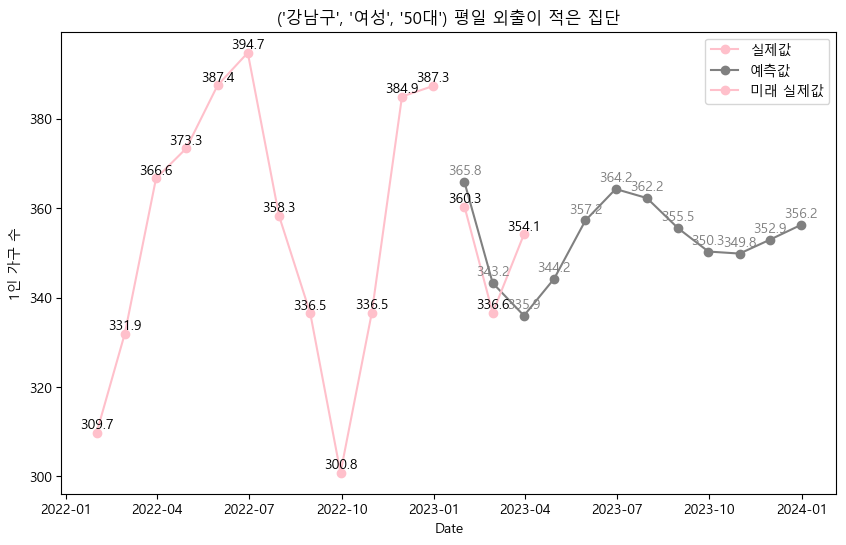

In [46]:
# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(df_col.index, df_pivot[region, gender, age], label='실제값', marker='o', color='pink')
for i in range(len(df_col.index)):
    height = df_pivot[region, gender, age][i]
    plt.text(df_col.index[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 10)

plt.plot(forecast.index, forecast, label='예측값', marker='o', color='gray')
for i in range(len(forecast.index)):
    height = forecast[i]
    plt.text(forecast.index[i], height + 1, '%.1f' %height, ha='center', va='bottom', size = 10, color='gray')


plt.plot(df_col2.index, df_pivot2[region, gender, age], label='미래 실제값', marker='o', color='pink')
for i in range(len(df_col2.index)):
    height = df_pivot2[region, gender, age][i]
    plt.text(df_col2.index[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 10)

plt.title(str(column_name) + ' ' + group)

plt.xlabel('Date')
plt.ylabel('1인 가구 수')
plt.legend()
plt.show()

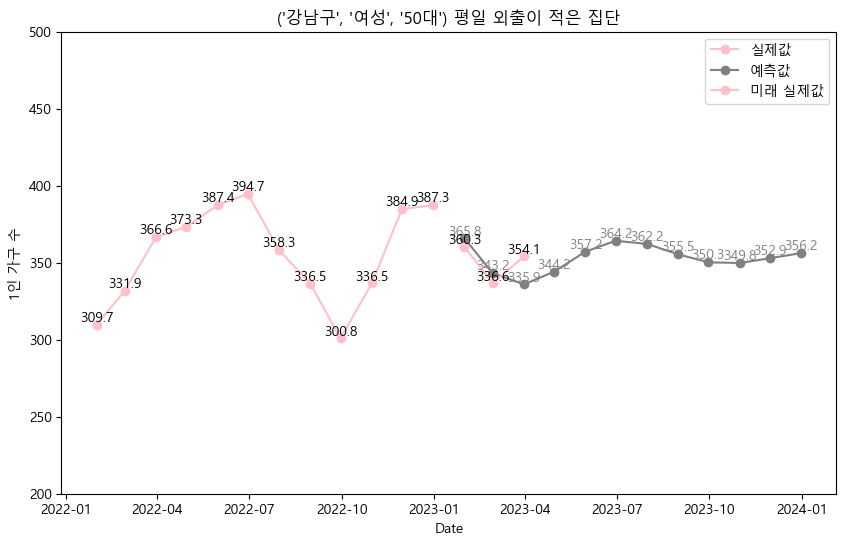

In [47]:
# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(df_col.index, df_pivot[region, gender, age], label='실제값', marker='o', color='pink')
for i in range(len(df_col.index)):
    height = df_pivot[region, gender, age][i]
    plt.text(df_col.index[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 10)
    
plt.plot(forecast.index, forecast, label='예측값', marker='o', color='gray')
for i in range(len(forecast.index)):
    height = forecast[i]
    plt.text(forecast.index[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 10, color='gray')


plt.plot(df_col2.index, df_pivot2[region, gender, age], label='미래 실제값', marker='o', color='pink')
for i in range(len(df_col2.index)):
    height = df_pivot2[region, gender, age][i]
    plt.text(df_col2.index[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 10)

    
plt.title(str(column_name) + ' ' + group)

plt.xlabel('Date')
plt.ylim(200, 500)
plt.ylabel('1인 가구 수')
plt.legend()
plt.show()

- MSE 작고, 예측값이 실제값과 비슷한편이다.